# EEE4114F
# IMU Gesture Prediction - Machine Learning Project
# By: Ntokozo Radebe (RDBNTO016) and Matshego Kgafela (KGFMAT002)

&nbsp;

## Introduction

In this project, we will classify IMU data to detect 3 gestures. The data has been acquired from an IPhone using the sensordata app. The 3 gestures are:
1. Up and down movement of cellphone
2. Left and Right movement of cellphone
3. Circular clockiwise movement of cellphone

The Model developed for gesture recognition follows that found at: https://techlabs-aachen.medium.com/human-activity-recognition-1-6f9fcc9c773c with the github repository:
https://github.com/adityamurali28/Human-Activity-Recognition/blob/main/Human%20Activity%20Recognition.ipynb

## Necessary Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

## Data Processing

In [ ]:
#Lets first read in all the dataframes
UpDown = pd.read_csv(r"UpDown.csv", header=0)
LeftRight = pd.read_csv(r"LeftRight.csv", header=0)
ClockwiseCircle = pd.read_csv(r"ClockwiseCircle.csv", header=0)
ClockwiseCircle.head(7)

,SamplingTime,AccelerationX,AccelerationY,AccelerationZ,GyroX,GyroY,GyroZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ
0,1.715798e+09,-0.124050,-2.015170,-9.926061,-0.204297,0.016179,0.115117,17.677704,141.629684,-236.626465
1,1.715798e+09,-0.325911,-1.994819,-10.207080,0.187038,0.025537,0.214231,17.940994,141.088547,-236.548035
2,1.715798e+09,-0.387561,-1.785177,-9.838822,0.314048,0.083846,0.224711,17.798111,141.234558,-236.642288
3,1.715798e+09,-0.511162,-1.885583,-9.783007,0.131453,0.106127,0.148322,17.896896,141.413574,-236.673157
4,1.715798e+09,-0.542137,-2.181417,-9.898378,-0.113732,0.109842,0.224911,18.059204,141.149475,-236.722382
5,1.715798e+09,-0.539144,-1.968333,-10.273669,-0.034738,0.238385,0.291019,18.092529,141.418625,-236.978134
6,1.715798e+09,-0.153678,-2.142661,-10.392182,0.117623,0.241990,0.356925,18.231110,141.431931,-236.893280


In [ ]:
#Assigning a gesture type to each datapoint in the dataframs

#Up-Down movement
UpDown['gesture'] = 'UpDown'

#Left-Right movement
LeftRight['gesture'] = 'LeftRight'

#Clockwise circle movement
ClockwiseCircle['gesture'] = 'ClockwiseCircle'

In [ ]:
ClockwiseCircle.head(10)

,SamplingTime,AccelerationX,AccelerationY,AccelerationZ,GyroX,GyroY,GyroZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,gesture
0,1.715798e+09,-0.124050,-2.015170,-9.926061,-0.204297,0.016179,0.115117,17.677704,141.629684,-236.626465,ClockwiseCircle
1,1.715798e+09,-0.325911,-1.994819,-10.207080,0.187038,0.025537,0.214231,17.940994,141.088547,-236.548035,ClockwiseCircle
2,1.715798e+09,-0.387561,-1.785177,-9.838822,0.314048,0.083846,0.224711,17.798111,141.234558,-236.642288,ClockwiseCircle
3,1.715798e+09,-0.511162,-1.885583,-9.783007,0.131453,0.106127,0.148322,17.896896,141.413574,-236.673157,ClockwiseCircle
4,1.715798e+09,-0.542137,-2.181417,-9.898378,-0.113732,0.109842,0.224911,18.059204,141.149475,-236.722382,ClockwiseCircle
5,1.715798e+09,-0.539144,-1.968333,-10.273669,-0.034738,0.238385,0.291019,18.092529,141.418625,-236.978134,ClockwiseCircle
6,1.715798e+09,-0.153678,-2.142661,-10.392182,0.117623,0.241990,0.356925,18.231110,141.431931,-236.893280,ClockwiseCircle
7,1.715798e+09,-0.366313,-2.955193,-10.420912,0.103048,0.276890,0.420163,18.020279,141.377090,-236.729492,ClockwiseCircle
8,1.715798e+09,0.034566,-3.185336,-10.676194,0.171929,0.094586,0.443642,18.080612,141.598877,-236.964828,ClockwiseCircle
9,1.715798e+09,0.380828,-3.278859,-10.280552,0.008974,-0.094671,0.623048,18.143311,141.417450,-237.028717,ClockwiseCircle


In [ ]:
# Now combining the dataframes into 1 dataframe
frames = [UpDown, LeftRight, ClockwiseCircle]
df = pd.concat(frames)
df.columns = df.columns.str.replace(' ', '')
df.head()

,SamplingTime,AccelerationX,AccelerationY,AccelerationZ,GyroX,GyroY,GyroZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,gesture
0,1.715798e+09,-1.753603,-2.331354,-8.439561,0.456124,0.555310,-0.090450,13.955444,140.436523,-236.974380,UpDown
1,1.715798e+09,-1.476923,-2.855684,-9.540295,0.120688,0.150036,0.061824,13.450424,140.883774,-236.941116,UpDown
2,1.715798e+09,-1.562366,-2.625242,-9.457845,-0.217074,-0.274828,0.174313,13.650925,140.853043,-237.269821,UpDown
3,1.715798e+09,-1.884087,-2.200122,-9.274838,-0.075786,0.003100,0.020594,13.918060,140.701401,-237.127838,UpDown
4,1.715798e+09,-1.536329,-2.598008,-9.870994,0.111955,0.188970,-0.099001,13.879562,140.823792,-237.058517,UpDown


### Label Encoding and Normalization

In [ ]:
if df['gesture'].isnull().sum() > 0:
     print("Warning 'gesture' column contains null values. Handle them before encoding.")
else:
    label_encode = LabelEncoder()
    #allocating a number to each label e.g. jogging = 1
    df['gestureEncode'] = label_encode.fit_transform(df['gesture'].values.ravel())

#normlasing the values in Acceleration, Gyroscope and Magnometer axis to be between 0 and 1
columns_to_normalize = ['AccelerationX', 'AccelerationY', 'AccelerationZ', 'GyroX', 'GyroY', 'GyroZ',
                        'MagneticFieldX', 'MagneticFieldY', 'MagneticFieldZ']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()

,SamplingTime,AccelerationX,AccelerationY,AccelerationZ,GyroX,GyroY,GyroZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,gesture,gestureEncode
0,1.715798e+09,0.223699,0.184648,0.602200,0.580871,0.545202,0.452033,0.211158,0.702143,0.536655,UpDown,2
1,1.715798e+09,0.232264,0.141738,0.560444,0.510107,0.483702,0.470416,0.185107,0.727141,0.538945,UpDown,2
2,1.715798e+09,0.229619,0.160597,0.563571,0.438852,0.419229,0.483996,0.195449,0.725423,0.516318,UpDown,2
3,1.715798e+09,0.219660,0.195388,0.570514,0.468658,0.461404,0.465438,0.209229,0.716948,0.526092,UpDown,2
4,1.715798e+09,0.230425,0.162825,0.547899,0.508265,0.489610,0.451000,0.207244,0.723788,0.530863,UpDown,2


In [ ]:
#splitting the data into training and test data
har_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
har_df.head(10)

,SamplingTime,AccelerationX,AccelerationY,AccelerationZ,GyroX,GyroY,GyroZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,gesture,gestureEncode
304,1.715798e+09,0.160475,0.753423,0.521190,0.773571,0.329235,0.621657,0.852939,0.356977,0.725855,ClockwiseCircle,0
896,1.715798e+09,0.242718,0.250386,0.821394,0.366700,0.330996,0.149311,0.746277,0.943293,0.020246,ClockwiseCircle,0
412,1.715798e+09,0.349484,0.226040,0.717002,0.256096,0.251717,0.213687,0.430735,0.918867,0.266812,ClockwiseCircle,0
261,1.715798e+09,0.349484,0.910848,0.272451,0.585151,0.530312,0.608765,0.387923,0.143979,0.864016,UpDown,2
239,1.715798e+09,0.374502,0.407553,0.446924,0.101784,0.394002,0.455814,0.402932,0.585097,0.787871,ClockwiseCircle,0
700,1.715798e+09,0.369314,0.462845,0.535859,0.461692,0.410748,0.125003,0.373126,0.573597,0.761851,LeftRight,1
889,1.715798e+09,0.282536,0.218705,0.570128,0.408955,0.548575,0.509159,0.352855,0.746525,0.586307,LeftRight,1
816,1.715798e+09,0.180254,0.648902,0.498570,0.565037,0.376041,0.169780,0.754287,0.380031,0.740148,LeftRight,1
179,1.715798e+09,0.220086,0.363014,0.624265,0.757569,0.366660,0.328103,0.783379,0.535073,0.658349,UpDown,2
409,1.715798e+09,0.519876,0.345698,0.541354,0.401446,0.399631,0.336290,0.229259,0.427292,0.791106,LeftRight,1


In [ ]:
print(har_df.shape)
print(test_df.shape)

(2214, 12)
(554, 12)


In [ ]:
har_df = har_df.sort_values(by = ['gestureEncode', 'SamplingTime'], ignore_index=True)
test_df = test_df.sort_values(by = ['gestureEncode', 'SamplingTime'], ignore_index=True)

## Data Visualisation

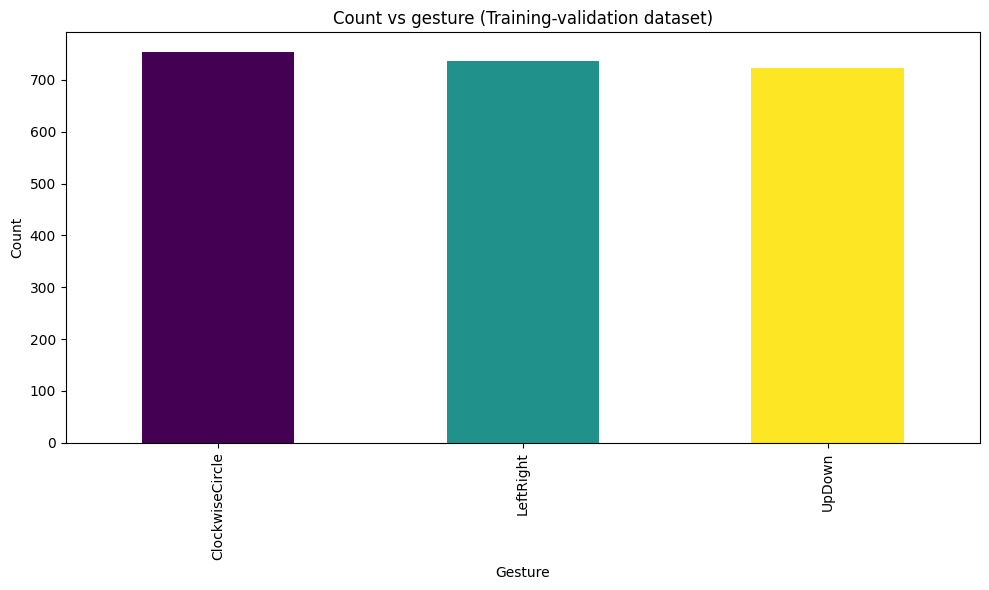

In [ ]:
#In the training data set
activity_counts = har_df['gesture'].value_counts()
n_colors = len(activity_counts)
colors = plt.cm.viridis(np.linspace(0, 1, n_colors))
plt.figure(figsize=(10,6))
activity_counts.plot(kind='bar', color=colors)
plt.title('Count vs gesture (Training-validation dataset)')
plt.xlabel('Gesture')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

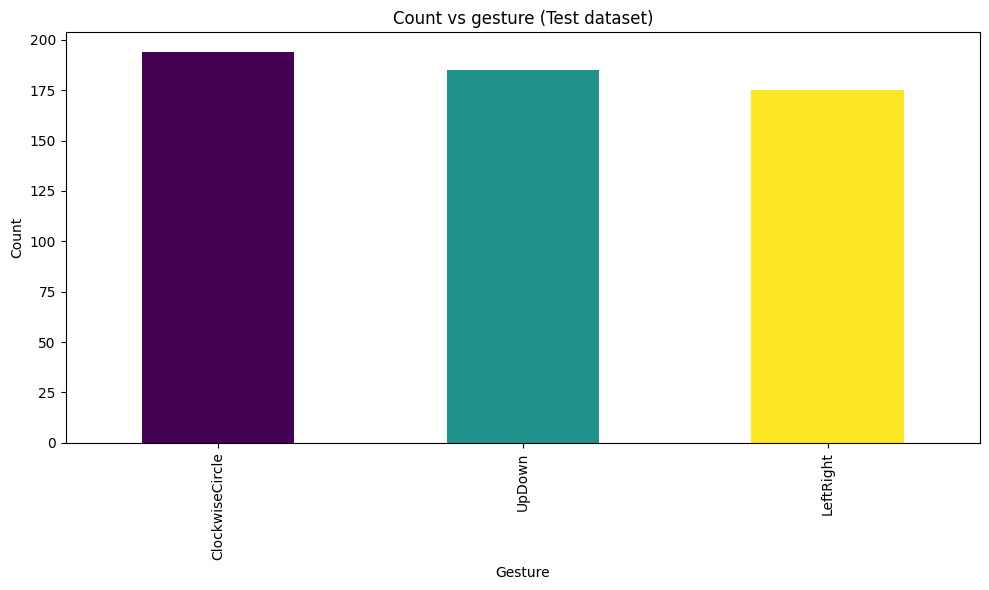

In [ ]:
#Now seeing how much of the data we have in the test data set
activity_counts = test_df['gesture'].value_counts()
n_colors = len(activity_counts)
colors = plt.cm.viridis(np.linspace(0, 1, n_colors))
plt.figure(figsize=(10,6))
activity_counts.plot(kind='bar', color=colors)
plt.title('Count vs gesture (Test dataset)')
plt.xlabel('Gesture')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

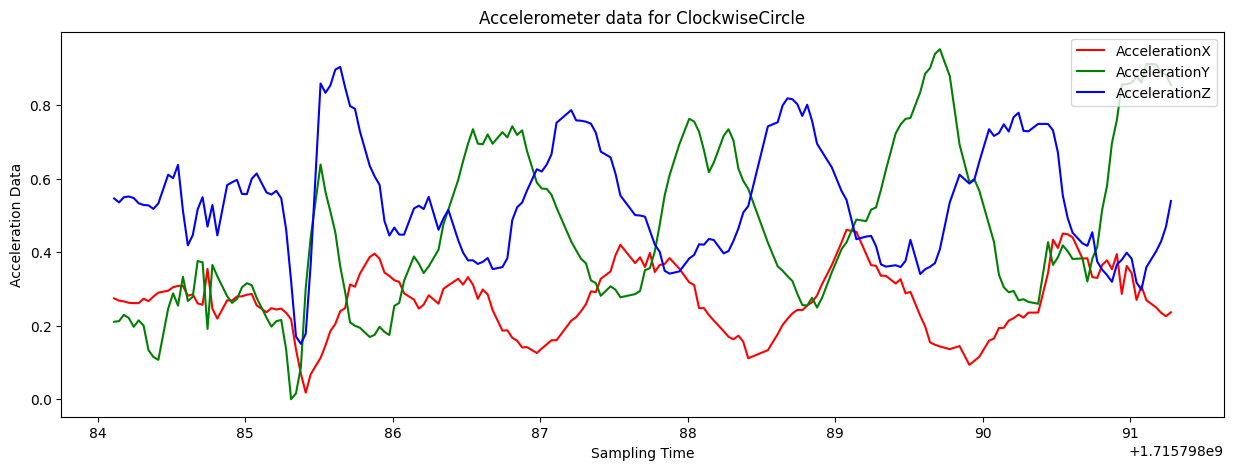

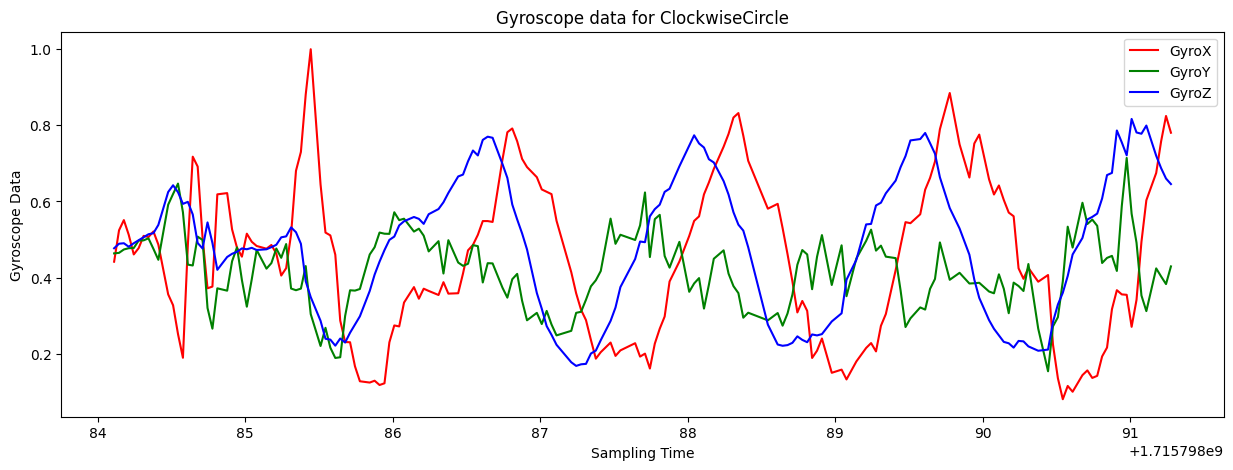

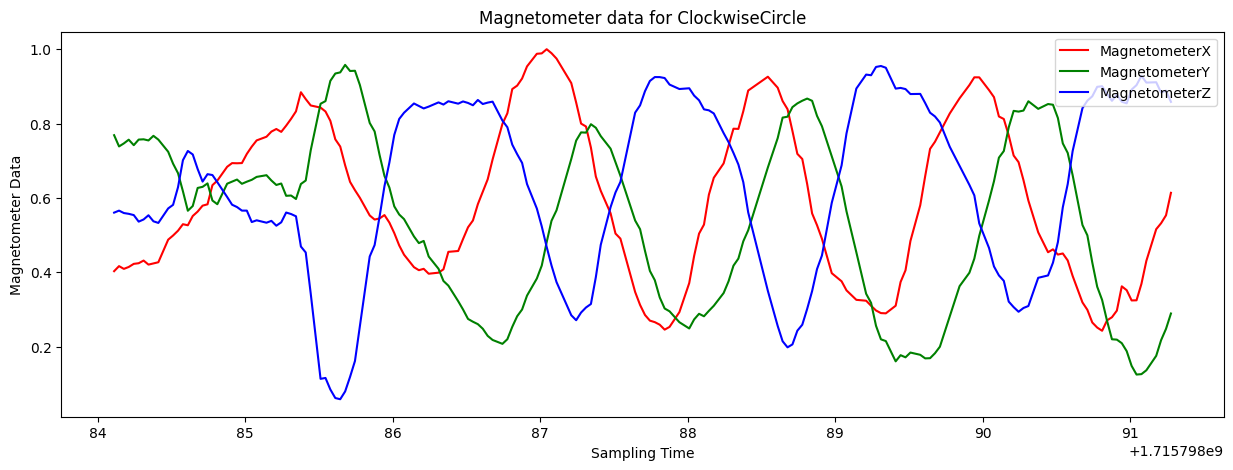

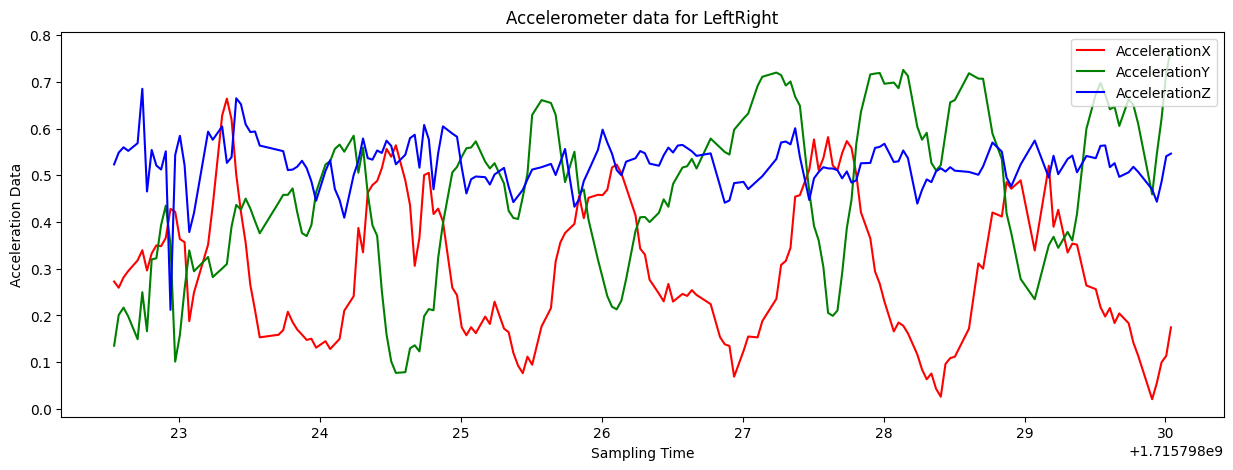

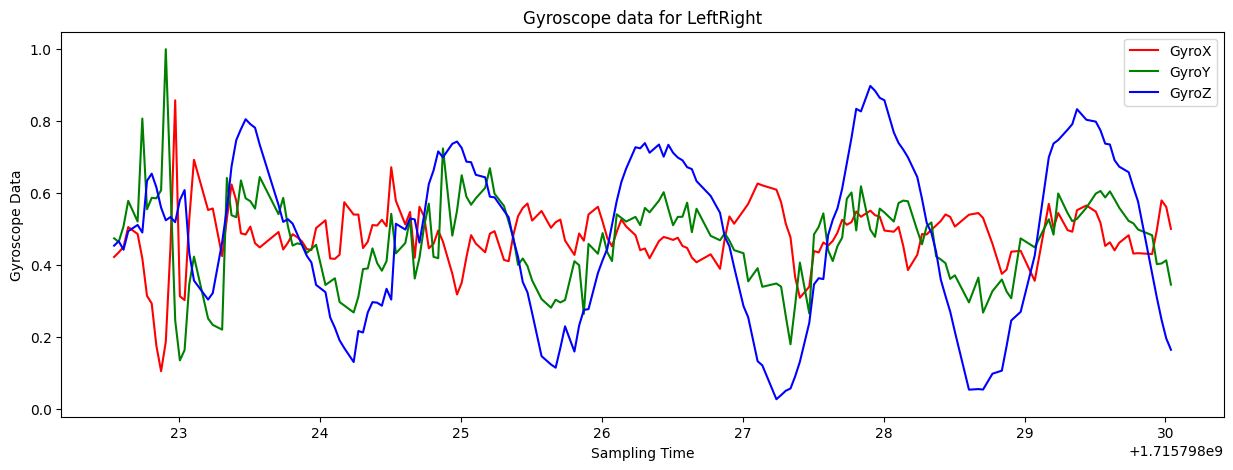

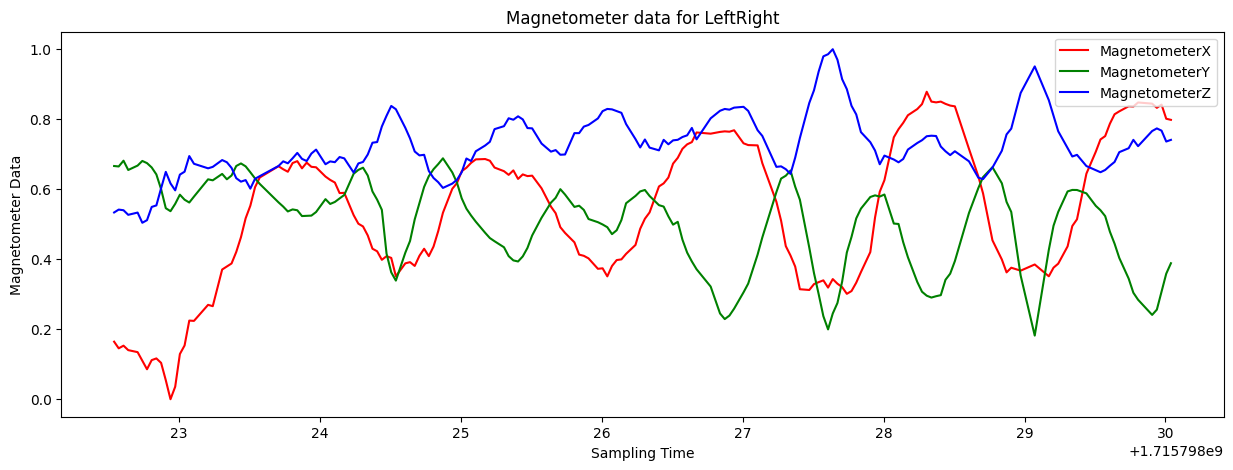

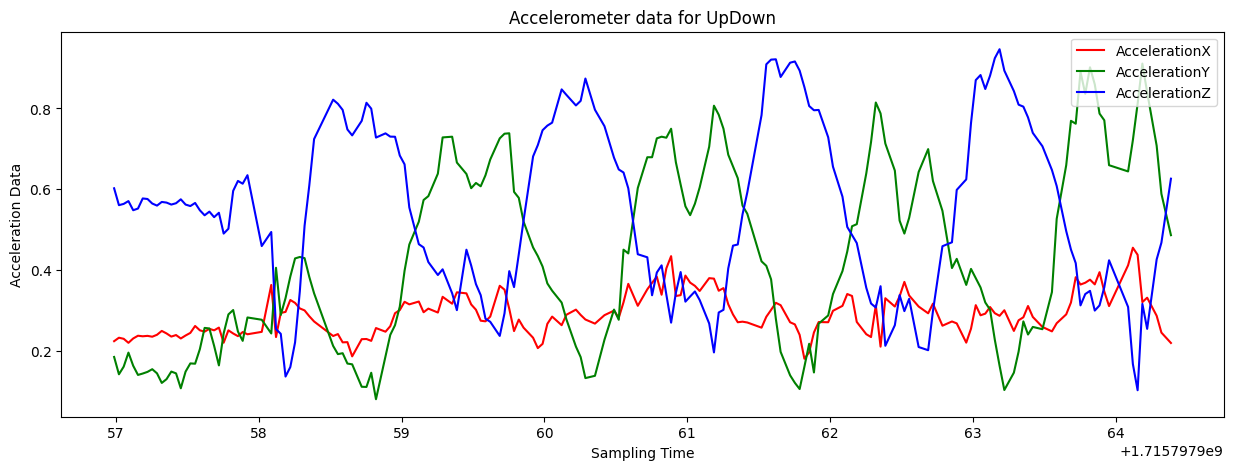

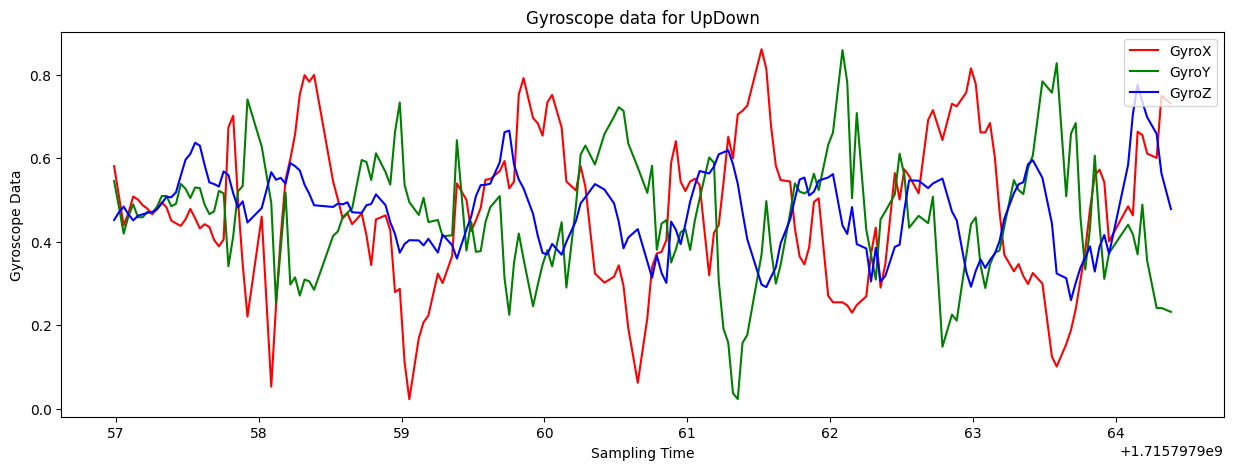

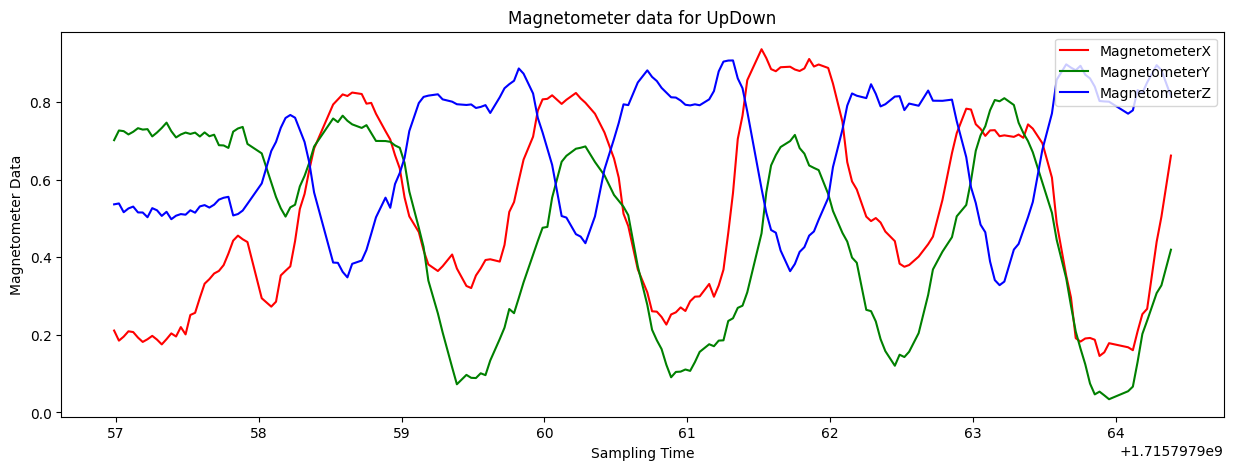

In [ ]:
# Plotting the time series data of the IMU

for gesture in har_df['gesture'].unique():
    gesture_data = har_df[har_df['gesture'] == gesture][:180]

    plt.figure(figsize=(15,5))
    plt.title(f'Accelerometer data for {gesture}')
    plt.plot(gesture_data['SamplingTime'], gesture_data['AccelerationX'], label='AccelerationX', color='r')
    plt.plot(gesture_data['SamplingTime'], gesture_data['AccelerationY'], label='AccelerationY', color='g')
    plt.plot(gesture_data['SamplingTime'], gesture_data['AccelerationZ'], label='AccelerationZ', color='b')
    plt.xlabel('Sampling Time')
    plt.ylabel('Acceleration Data')
    plt.legend(loc='upper right')
    plt.savefig(f'Accelerometer data for {gesture}')
    plt.show()

    plt.figure(figsize=(15,5))
    plt.title(f'Gyroscope data for {gesture}')
    plt.plot(gesture_data['SamplingTime'], gesture_data['GyroX'], label='GyroX', color='r')
    plt.plot(gesture_data['SamplingTime'], gesture_data['GyroY'], label='GyroY', color='g')
    plt.plot(gesture_data['SamplingTime'], gesture_data['GyroZ'], label='GyroZ', color='b')
    plt.xlabel('Sampling Time')
    plt.ylabel('Gyroscope Data')
    plt.legend(loc='upper right')
    plt.savefig(f'Gyroscope data for {gesture}')
    plt.show()

    plt.figure(figsize=(15,5))
    plt.title(f'Magnetometer data for {gesture}')
    plt.plot(gesture_data['SamplingTime'], gesture_data['MagneticFieldX'], label='MagnetometerX', color='r')
    plt.plot(gesture_data['SamplingTime'], gesture_data['MagneticFieldY'], label='MagnetometerY', color='g')
    plt.plot(gesture_data['SamplingTime'], gesture_data['MagneticFieldZ'], label='MagnetometerZ', color='b')
    plt.xlabel('Sampling Time')
    plt.ylabel('Magnetometer Data')
    plt.legend(loc='upper right')
    plt.savefig(f'Magnetometer data for {gesture}')
    plt.show()



## Windowing to prepare the data for model training

In [ ]:
window_size = 30
sequences = []
labels = []
ges_type = []

#Looping thorugh each gesture
for gestureId, gestureData in har_df.groupby('gestureEncode'):

    gesture_sequences = []
    gesture_labels = []
    gesture_type = []

    for i in range(0, len(gestureData) - window_size + 1):
        window = gestureData.iloc[i:i+ window_size]
        sequence = window[['AccelerationX', 'AccelerationY', 'AccelerationZ',
                          'GyroX', 'GyroY', 'GyroZ',
                          'MagneticFieldX', 'MagneticFieldY', 'MagneticFieldZ']].values
        label = window['gestureEncode'].values[-1]
        gtype = window['gesture'].values[-1]
        gesture_sequences.append(sequence)
        gesture_labels.append(label)
        gesture_type.append(gtype)

    sequences.extend(gesture_sequences)
    labels.extend(gesture_labels)
    ges_type.extend(gesture_type)

sequences = np.array(sequences)
labels = np.array(labels)


## Training the model

In [ ]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

f1_scores = []
test_losses = []
test_accuracies = []
train_accuracies = []

n_activities = har_df['gestureEncode'].nunique()
total_confusion = np.zeros((n_activities, n_activities))

train_accuracies = []
train_losses = []
val_accuracies = []
val_losses = []

for train_index, test_index in skf.split(sequences, labels):
    X_train, X_test = sequences[train_index], sequences[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(window_size, 9)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
model.add(Dense(n_activities, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=2)

Epoch 1/100
27/27 - 6s - loss: 1.3192 - accuracy: 0.4642 - val_loss: 1.2430 - val_accuracy: 0.5176 - 6s/epoch - 233ms/step
Epoch 2/100
27/27 - 1s - loss: 1.1237 - accuracy: 0.6610 - val_loss: 0.8507 - val_accuracy: 0.8118 - 602ms/epoch - 22ms/step
Epoch 3/100
27/27 - 1s - loss: 0.7262 - accuracy: 0.7908 - val_loss: 0.5073 - val_accuracy: 0.8565 - 614ms/epoch - 23ms/step
Epoch 4/100
27/27 - 1s - loss: 0.4528 - accuracy: 0.8937 - val_loss: 0.2991 - val_accuracy: 0.9341 - 614ms/epoch - 23ms/step
Epoch 5/100
27/27 - 1s - loss: 0.2995 - accuracy: 0.9418 - val_loss: 0.2038 - val_accuracy: 0.9694 - 612ms/epoch - 23ms/step
Epoch 6/100
27/27 - 1s - loss: 0.2239 - accuracy: 0.9571 - val_loss: 0.1424 - val_accuracy: 0.9835 - 627ms/epoch - 23ms/step
Epoch 7/100
27/27 - 1s - loss: 0.2070 - accuracy: 0.9618 - val_loss: 0.1717 - val_accuracy: 0.9718 - 586ms/epoch - 22ms/step
Epoch 8/100
27/27 - 1s - loss: 0.2041 - accuracy: 0.9577 - val_loss: 0.1187 - val_accuracy: 0.9882 - 626ms/epoch - 23ms/step
Ep

In [ ]:
print(labels)

[0 0 0 ... 2 2 2]


# Results

In [ ]:
train_accuracies.extend(history.history['accuracy'])
val_accuracies.extend(history.history['val_accuracy'])
train_losses.extend(history.history['loss'])
val_losses.extend(history.history['val_loss'])

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

14/14 [==============================] - 0s 4ms/step


In [ ]:
print(X_test.shape)

(425, 30, 9)


In [ ]:
print(y_pred_labels)

[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Mean F1 Score: 0.9976 (±0.0000)
Mean Training Loss: 0.0390 (±0.0000)
Mean Validation Accuracy: 0.9976 (±0.0000)
Mean Training Accuracy: 0.9473 (±0.1039)


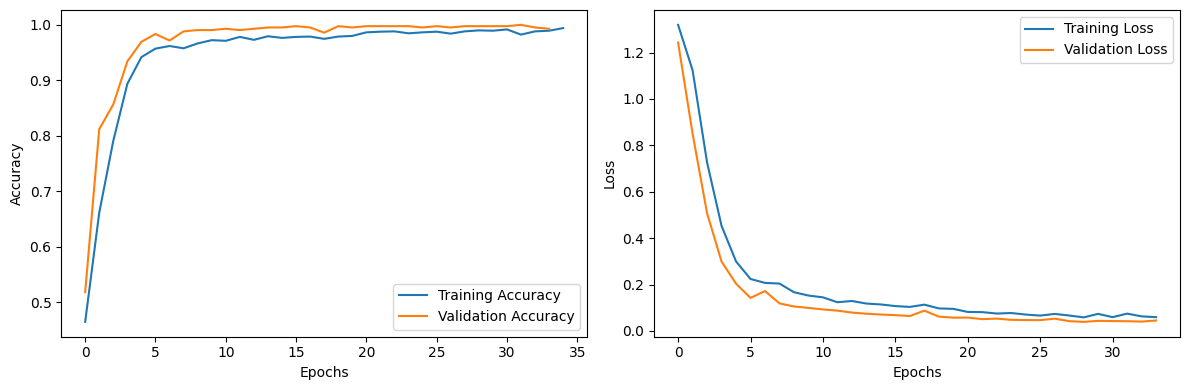

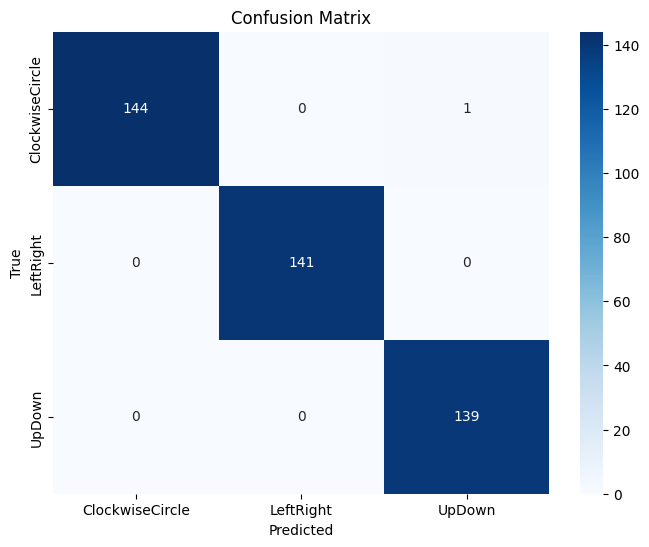

In [ ]:
confusion = confusion_matrix(y_test, y_pred_labels)
total_confusion += confusion

f1 = f1_score(y_test, y_pred_labels, average='weighted')

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

f1_scores.append(f1)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)
train_accuracies.append(train_accuracy)

mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_test_loss = np.mean(test_losses)
std_test_loss = np.std(test_losses)

mean_test_accuracy = np.mean(test_accuracies)
std_test_accuracy = np.std(test_accuracies)

mean_train_accuracy = np.mean(train_accuracies)
std_train_accuracy = np.std(train_accuracies)

print(f"Mean F1 Score: {mean_f1:.4f} (±{std_f1:.4f})")
print(f"Mean Training Loss: {mean_test_loss:.4f} (±{std_test_loss:.4f})")
print(f"Mean Validation Accuracy: {mean_test_accuracy:.4f} (±{std_test_accuracy:.4f})")
print(f"Mean Training Accuracy: {mean_train_accuracy:.4f} (±{std_train_accuracy:.4f})")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion.astype(int), annot=True, fmt='d', cmap='Blues',
            xticklabels=har_df['gesture'].unique(),
            yticklabels=har_df['gesture'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Testing the  Model on different unseen data

In [ ]:
Test = pd.read_csv(r"sensordata.csv", header=0)

In [ ]:
Test.head()

,SamplingTime,AccelerationX,AccelerationY,AccelerationZ,GyroX,GyroY,GyroZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ
0,1.715947e+09,0.456694,-0.392649,-10.043526,0.068992,0.091356,0.050121,8.822556,118.451462,-234.935074
1,1.715947e+09,0.563386,-0.238971,-9.912145,0.042223,0.029100,-0.058595,8.502121,118.457260,-235.025253
2,1.715947e+09,0.584933,-0.353594,-9.734375,0.346533,1.066472,-0.159609,8.245132,118.611069,-235.206070
3,1.715947e+09,1.079785,-0.756717,-10.190321,0.451563,1.165612,-0.115967,8.018387,118.840195,-235.402191
4,1.715947e+09,1.082927,-0.982820,-9.614066,0.279664,0.644397,-0.036131,7.046326,119.218277,-235.450623


In [ ]:
Test.columns = Test.columns.str.replace(' ', '')


In [ ]:
print(Test.shape)

(423, 10)


In [ ]:
#Before_prediction = Before_prediction.reshape(1, window_size, 9, 1)  # Assuming window_size is the correct value

test_sequence = []
for i in range(0, len(Test) - window_size + 1):
    Test_window = Test.iloc[i:i+window_size]
    sequence = window[['AccelerationX', 'AccelerationY', 'AccelerationZ',
                      'GyroX', 'GyroY', 'GyroZ',
                      'MagneticFieldX', 'MagneticFieldY', 'MagneticFieldZ']].values

    test_sequence.append(sequence)

test_sequence = np.array(test_sequence)

In [ ]:
print(test_sequence.shape)

(394, 30, 9)


In [ ]:
y_pred_new = model.predict(test_sequence)
y_pred_labels = np.argmax(y_pred_new, axis=1)
if y_pred_labels[-1] == 2:
  print("Predicted Motion: Up and Down")

13/13 [==============================] - 0s 7ms/step
Predicted Motion: Up and Down


The model performs quite succesfully. The Up and Down movement was labelled with the Number 2. When tested on new data (which emulated an up and down movement) the model was able to guess '2'.